In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils, plots
import arviz as az

### Model 1

In [8]:
# Directory of pickle file
pickelDir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/Model_secondOrder/hier/para_recov/para_recov_model1_sim_1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [120]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"hier_alphaAct_mu[0, 0]",-0.807,0.068,-0.935,-0.680,0.001,0.000,13772.0,17218.0,1.0
"hier_alphaAct_mu[0, 1]",-1.663,0.233,-2.103,-1.253,0.002,0.001,24495.0,16354.0,1.0
"hier_alphaAct_mu[1, 0]",-0.607,0.068,-0.734,-0.479,0.001,0.000,12293.0,15603.0,1.0
"hier_alphaAct_mu[1, 1]",-1.382,0.348,-2.035,-0.779,0.003,0.002,19272.0,14128.0,1.0
"hier_alphaClr_mu[0, 0]",-0.652,0.489,-1.452,0.323,0.004,0.003,19278.0,11957.0,1.0
...,...,...,...,...,...,...,...,...,...
"transfer_hier_weightAct_mu[1, 1]",0.541,0.046,0.454,0.629,0.000,0.000,23496.0,18719.0,1.0
"transfer_hier_sensitivity_mu[0, 0]",0.085,0.005,0.076,0.094,0.000,0.000,11898.0,16053.0,1.0
"transfer_hier_sensitivity_mu[0, 1]",0.028,0.002,0.025,0.032,0.000,0.000,17628.0,17683.0,1.0
"transfer_hier_sensitivity_mu[1, 0]",0.079,0.005,0.070,0.089,0.000,0.000,10994.0,15086.0,1.0


In [109]:
log_lik = fit['log_lik']
utils.waic(log_likelihood=log_lik)

{'lppd': -10447.7956776139,
 'p_waic': 5697.282766514302,
 'waic': 32290.156888256402,
 'waic_se': 1.6143681070948381}

(0.0, 1.0)

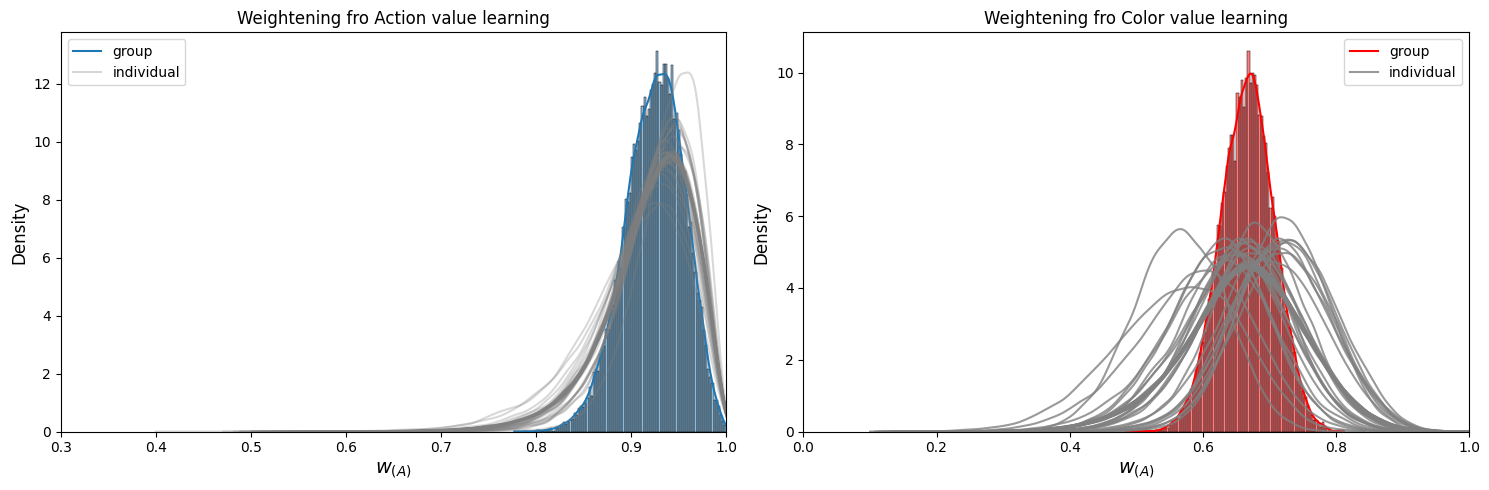

In [10]:
# Weghtening
transfer_weightAct_hier = fit["transfer_hier_weightAct_mu"] 
transfer_weightAct_parts = fit["transfer_weightAct"]

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(15, 5), tight_layout=True)
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
sns.histplot(transfer_weightAct_hier[0,0], kde=True, stat='density', bins=100)
for i in range(1, transfer_weightAct_parts.shape[0]):
    sns.kdeplot(transfer_weightAct_parts[i, 0, 0,: ].T, alpha = .3, common_norm=False, color='gray')
plt.legend(['group', 'individual'])
plt.title('Weightening fro Action value learning', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.xlim(.3, 1) 


fig.add_subplot(rows, columns, 2)
sns.histplot(transfer_weightAct_hier[0,1], kde=True, stat='density', bins=100, color='red')
for i in range(1, transfer_weightAct_parts.shape[0]):
    sns.kdeplot(transfer_weightAct_parts[i, 0, 1,: ].T, alpha = .8, common_norm=False, color='gray')
plt.legend(['group', 'individual'])
plt.title('Weightening fro Color value learning', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.xlim(0, 1) 


(0.0, 1.0)

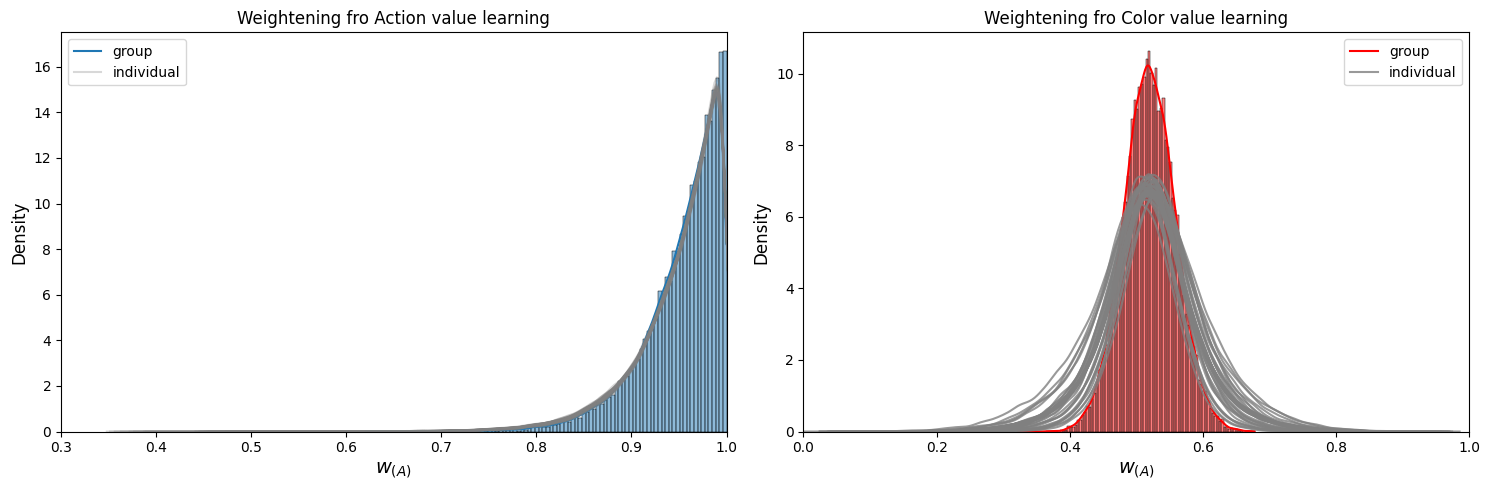

In [7]:
# Weghtening
transfer_weightAct_hier = fit["transfer_hier_weightAct_mu"] 
transfer_weightAct_parts = fit["transfer_weightAct"]

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(15, 5), tight_layout=True)
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
sns.histplot(transfer_weightAct_hier[0,0], kde=True, stat='density', bins=100)
sns.kdeplot(transfer_weightAct_parts[0, 0, 0,: ].T, alpha = .3, common_norm=False, color='gray', label ='individual')
for i in range(1, transfer_weightAct_parts.shape[0]):
    sns.kdeplot(transfer_weightAct_parts[i, 0, 0,: ].T, alpha = .3, common_norm=False, color='gray')
plt.legend(['group', 'individual'])
plt.title('Weightening fro Action value learning', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.xlim(.3, 1) 


fig.add_subplot(rows, columns, 2)
sns.histplot(transfer_weightAct_hier[0,1], kde=True, stat='density', bins=100, color='red')
sns.kdeplot(transfer_weightAct_parts[0, 0, 1,: ].T, alpha = .8, common_norm=False, color='gray', label ='individual')
for i in range(1, transfer_weightAct_parts.shape[0]):
    sns.kdeplot(transfer_weightAct_parts[i, 0, 1,: ].T, alpha = .8, common_norm=False, color='gray')
plt.legend(['group', 'individual'])
plt.title('Weightening fro Color value learning', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)
plt.xlim(0, 1) 


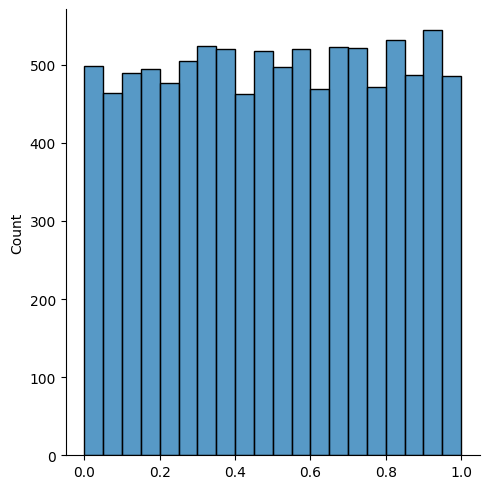

In [67]:
from scipy import stats
import seaborn as sns
mu_alpha = np.random.normal(0, 1, size=10000)
transf_mu_alpha = stats.norm.cdf(mu_alpha)
sns.displot(transf_mu_alpha, bins=20)


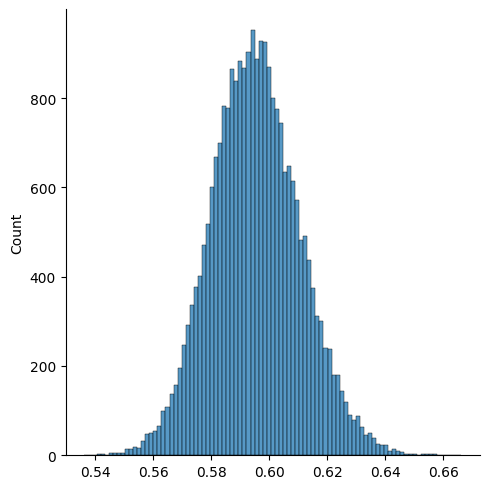

In [119]:
sns.displot(stats.norm.cdf(fit['hier_alphaAct_sd'][0,:]))

In [110]:
from scipy import stats
import numpy as np
stats.norm.cdf(np.random.normal(0, .1, 25))

array([0.48016593, 0.56188295, 0.5058288 , 0.53600835, 0.51814508,
       0.49590877, 0.52565499, 0.48152061, 0.49142071, 0.52729453,
       0.52874269, 0.50364547, 0.43728622, 0.39558541, 0.48738691,
       0.59997401, 0.50911098, 0.53980427, 0.53454603, 0.47363561,
       0.52409164, 0.49697826, 0.49398432, 0.566651  , 0.51606064])

In [106]:
np.std(stats.norm.cdf(np.random.normal(2, .9, 1000)))

0.11582307011523181

In [107]:
?np.random.normal

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int 

In [19]:
sensitivity =  1
Q1 = 30
Q2 = 9
tmp = sensitivity*Q1 - np.log(np.exp(sensitivity*Q1) + np.exp(sensitivity*Q2))
np.exp(tmp)


0.9999999992417443

In [29]:
xxx.shape

()

In [48]:
Q1= np.linspace(0, 100, 1000)
xxx = np.exp(sensitivity*Q1)/(np.exp(sensitivity*Q1) + 1)
xxx>.9991

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
np.exp(0)

1.0

In [49]:
Q1= np.linspace(0, 100, 1000)
xxx = np.exp(sensitivity*Q1 - np.log(np.exp(sensitivity*Q1) +1))
xxx>.9991


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,